Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3518 entries, 0 to 3517
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   BASE_DATE  3518 non-null   object  
 1   ADM_CD     3518 non-null   int64   
 2   ADM_NM     3518 non-null   object  
 3   geometry   3518 non-null   geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 110.1+ KB


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


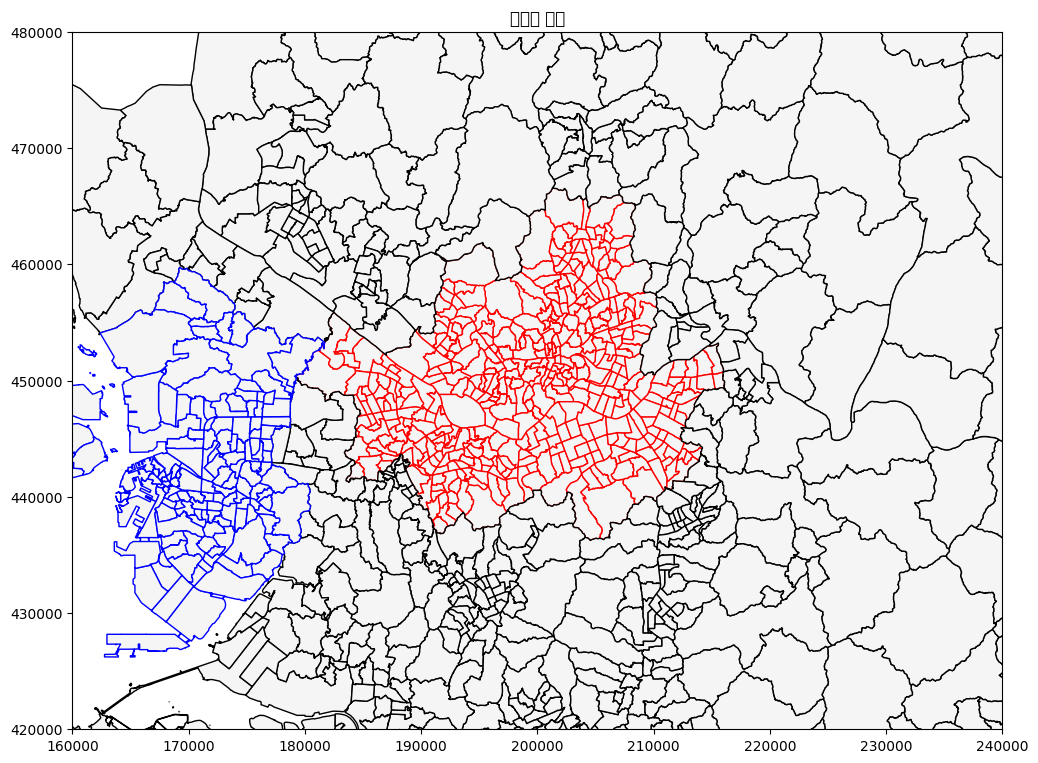

In [16]:
import geopandas as gpd
from google.colab import drive
drive.mount('/content/gdrive')
import matplotlib.pyplot as plt
# prepare and read data
F1 = '/content/gdrive/My Drive/seoulmovingdata/Z_SOP_BND_ADM_DONG_PG.shp'
D1 = gpd.read_file(F1, encoding='cp949')
df1 = D1.astype({ 'ADM_CD' : 'int' })
df1.info()
map = df1 # 서울시 한정 [df1['ADM_CD']<20000000]
# 데이터 필터링: 서울, 경기도, 인천광역시 한정

# 데이터 필터링: 서울시 한정
seoul_map = map[map['ADM_CD'] < 12000000]
gyeonggi_map = map[(map['ADM_CD'] >= 31000000) & (map['ADM_CD'] < 32000000)]
incheon_map = map[(map['ADM_CD'] >= 23000000) & (map['ADM_CD'] < 24000000)]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 12))
seoul_map.plot(ax=ax, color='whitesmoke', edgecolor='red')
gyeonggi_map.plot(ax=ax, color='whitesmoke', edgecolor='black')
incheon_map.plot(ax=ax, color='whitesmoke', edgecolor='blue')
plt.title("서울시 지도")
plt.xlim([160000,240000])
plt.ylim([420000,480000])
plt.show()



In [ ]:
import folium

# 군자동의 위도와 경도 (Google Maps 등을 통해 찾아낼 수 있음)
latitude = 37.555185
longitude = 127.078663

# 군자동을 중심으로 하는 지도 생성
m = folium.Map(location=[latitude, longitude], zoom_start=8)

# 100km 반경의 원 추가
folium.Circle(
    location=[latitude, longitude],
    radius=1000,  # 100km는 100,000m
    color='blue',
    fill=True,
    fill_color='blue'
).add_to(m)

m


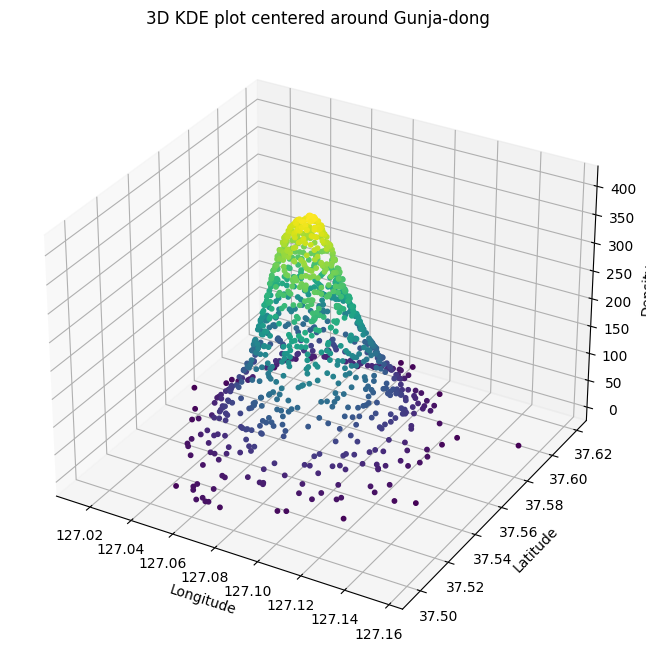

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 군자동의 위도와 경도
latitude = 37.555185
longitude = 127.078663

# 임의의 데이터 생성: 군자동을 중심으로 하는 임의의 포인트들
np.random.seed(42)
x = np.random.normal(longitude, 0.02, 1000)  # 경도에 대한 데이터
y = np.random.normal(latitude, 0.02, 1000)   # 위도에 대한 데이터

# 2D KDE 계산
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# 3D 플롯 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, s=10, depthshade=False)

# 레이블 및 타이틀 설정
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Density')
ax.set_title('3D KDE plot centered around Gunja-dong')

plt.show()


In [ ]:
import folium
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib.image as mpimg

# 군자동의 위도와 경도
latitude = 37.555185
longitude = 127.078663

# folium으로 지도 생성 후 이미지로 저장
m = folium.Map(location=[latitude, longitude], zoom_start=15)
m.save("map.html")

# 이 부분에서 웹 페이지를 스크린샷으로 이미지로 변환하는 과정이 필요합니다.
# 여러 방법이 있지만, 일반적으로는 selenium 등의 도구를 사용합니다.

# 스크린샷된 이미지를 로드
map_img = mpimg.imread('map_screenshot.png')

# 임의의 데이터 생성
np.random.seed(42)
x = np.random.normal(longitude, 0.02, 1000)
y = np.random.normal(latitude, 0.02, 1000)

# 2D KDE 계산
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# 3D 플롯 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, s=10, depthshade=False)

# 지도 이미지를 3D 플롯 바닥에 표시
ax.imshow(map_img, aspect='auto', extent=[x.min(), x.max(), y.min(), y.max()], zorder=0, alpha=0.5)

# 레이블 및 타이틀 설정
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Density')
ax.set_title('3D KDE plot centered around Gunja-dong')

plt.show()

FileNotFoundError: ignored